In [2]:
"""Data Cleaning."""

'Data Cleaning.'

In [1]:
import numpy as np
import pandas as pd
import random


In [4]:
df = pd.read_csv('/Users/glebtrofimov/Downloads/life_expectancy.csv')

In [5]:
df

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


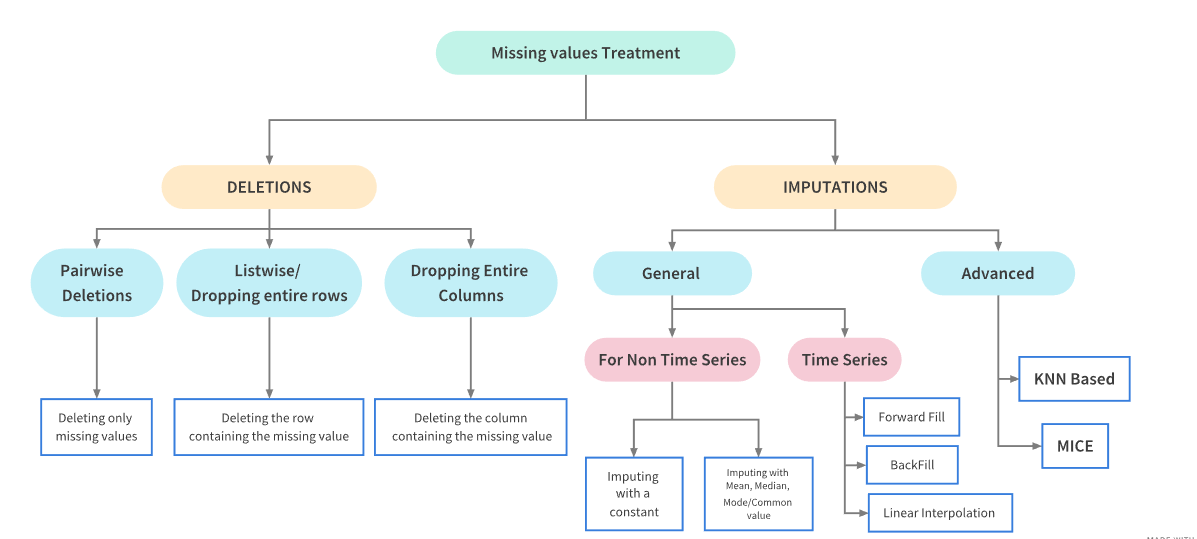

# Dealing with missing data

Missing data can arise in the dataset due to multiple reasons: the data for the specific field was not added by the user/data collection application, data was lost while transferring manually, a programming error, etc. 

For numerical data, pandas uses a floating point value NaN (Not a Number) to represent missing data. It is a unique value defined under the library Numpy so we will need to import it as well. NaN is the default missing value marker for reasons of computational speed and convenience. This is a sentinel value, in the sense that it is a dummy data or flag value that can be easily detected and worked with using functions in pandas.

In [6]:
series = pd.Series([1, 2, 3, 4, 5, np.nan, 6, 7, 8, 9, 0])
series

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     NaN
6     6.0
7     7.0
8     8.0
9     9.0
10    0.0
dtype: float64

In [7]:
series.mean()

4.5

In [8]:
series.isnull()

0     False
1     False
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [9]:
series = series.dropna() # removing all the NaNs
series

0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
6     6.0
7     7.0
8     8.0
9     9.0
10    0.0
dtype: float64

In [11]:
series.isnull()

0     False
1     False
2     False
3     False
4     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [12]:
series.mean()

4.5

In [13]:
data = {'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
        'condition': ['serious', 'serious', np.nan, 'stable', np.nan,
                      'stable', 'stable', 'serious', 'serious', np.nan, 'stable', np.nan]}

In [14]:
machine_cdtn = pd.DataFrame(data)
machine_cdtn

,month,condition
0,1,serious
1,2,serious
2,3,NaN
3,4,stable
4,5,NaN
5,6,stable
6,7,stable
7,8,serious
8,9,serious
9,10,NaN


In [15]:
machine_cdtn.dropna(axis=0) # removes NaNs row-wise

,month,condition
0,1,serious
1,2,serious
3,4,stable
5,6,stable
6,7,stable
7,8,serious
8,9,serious
10,11,stable


In [16]:
machine_cdtn.dropna(axis=1) # removes NaNs column-wise

,month
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [17]:
# only removes columns that contain nothing but NaNs
machine_cdtn.dropna(how='all')

,month,condition
0,1,serious
1,2,serious
2,3,NaN
3,4,stable
4,5,NaN
5,6,stable
6,7,stable
7,8,serious
8,9,serious
9,10,NaN


# Filling in Missing Data

In [18]:
machine_cdtn.fillna('unknown')

,month,condition
0,1,serious
1,2,serious
2,3,unknown
3,4,stable
4,5,unknown
5,6,stable
6,7,stable
7,8,serious
8,9,serious
9,10,unknown


# Data Transformation

# Applying to a real dataframe

In [19]:
df

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


lets make the missing data visible

In [20]:
df_na = df[df.isna().any(axis=1)]
df_na

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
32,Algeria,2015,Developing,39871528.0,95.0,63,95.0,95.0,0.1,21,24,NaN,4132.762920,59.5,6.0,NaN,14.4,75.6
44,Algeria,2003,Developing,3243514.0,NaN,15374,87.0,87.0,0.1,20,23,3.60,294.335560,47.0,6.3,0.34,11.5,71.7
45,Algeria,2002,Developing,3199546.0,NaN,5862,86.0,86.0,0.1,20,23,3.73,1774.336730,46.1,6.3,0.36,11.1,71.6
46,Algeria,2001,Developing,31592153.0,NaN,2686,89.0,89.0,0.1,20,24,3.84,1732.857979,45.3,6.4,0.23,10.9,71.4
47,Algeria,2000,Developing,3118366.0,NaN,0,86.0,86.0,0.1,21,25,3.49,1757.177970,44.4,6.5,0.25,10.7,71.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2828,Zambia,2003,Developing,11421984.0,NaN,881,85.0,83.0,18.2,39,62,8.18,429.158343,17.6,7.3,2.33,10.2,46.4
2829,Zambia,2002,Developing,111249.0,NaN,25036,85.0,84.0,18.4,41,66,6.93,377.135244,17.3,7.4,2.44,10.0,45.5
2830,Zambia,2001,Developing,1824125.0,NaN,16997,86.0,85.0,18.6,43,70,6.56,378.273624,17.1,7.4,2.61,9.8,44.6
2831,Zambia,2000,Developing,1531221.0,NaN,30930,85.0,85.0,18.7,44,72,7.16,341.955625,16.8,7.5,2.62,9.6,43.8


lets replace Hepatitis column's missing values with the average value

In [21]:
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].mean())
df

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
0,Afghanistan,2015,Developing,33736494.0,65.0,1154,6.0,65.0,0.1,62,83,8.16,584.259210,19.1,17.2,0.01,10.1,65.0
1,Afghanistan,2014,Developing,327582.0,62.0,492,58.0,62.0,0.1,64,86,8.18,612.696514,18.6,17.5,0.01,10.0,59.9
2,Afghanistan,2013,Developing,31731688.0,64.0,430,62.0,64.0,0.1,66,89,8.13,631.744976,18.1,17.7,0.01,9.9,59.9
3,Afghanistan,2012,Developing,3696958.0,67.0,2787,67.0,67.0,0.1,69,93,8.52,669.959000,17.6,17.9,0.01,9.8,59.5
4,Afghanistan,2011,Developing,2978599.0,68.0,3013,68.0,68.0,0.1,71,97,7.87,63.537231,17.2,18.2,0.01,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,Zimbabwe,2004,Developing,12777511.0,68.0,31,67.0,65.0,33.6,27,42,7.13,454.366654,27.1,9.4,4.36,9.2,44.3
2844,Zimbabwe,2003,Developing,12633897.0,7.0,998,7.0,68.0,36.7,26,41,6.52,453.351155,26.7,9.8,4.06,9.5,44.5
2845,Zimbabwe,2002,Developing,125525.0,73.0,304,73.0,71.0,39.8,25,40,6.53,57.348340,26.3,1.2,4.43,10.0,44.8
2846,Zimbabwe,2001,Developing,12366165.0,76.0,529,76.0,75.0,42.1,25,39,6.16,548.587312,25.9,1.6,1.72,9.8,45.3


In [22]:
# also we can replace NaNs in every column with its unique value

# data_dim_fill = data_dim.fillna({0: 0, 1: 8, 2: 9, 3: 10})
#ndata_dim_fill

# Replacing Values

In [23]:
data1 = pd.Series([1,2,-99,4,5,-99,7,8,-99])

data1


0     1
1     2
2   -99
3     4
4     5
5   -99
6     7
7     8
8   -99
dtype: int64

In [24]:
# Replace the placeholder -99 as NaN
data1.replace(-99, np.nan)


0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
5    NaN
6    7.0
7    8.0
8    NaN
dtype: float64

# Concatenating Pandas Series

In [29]:
# Create a new Series
new_data = pd.Series([-100, 11, 12, 13])
combined_series = pd.concat([data1, new_data], ignore_index = True)
combined_series


0       1
1       2
2     -99
3       4
4       5
5     -99
6       7
7       8
8     -99
9    -100
10     11
11     12
12     13
dtype: int64

In [ ]:
# Let's replace -99 and -100 as NaN in the new combined_series
data_replaced = combined_series.replace([-99, -100], np.nan)
data_replaced


0      1.0
1      2.0
2      NaN
3      4.0
4      5.0
5      NaN
6      7.0
7      8.0
8      NaN
9      NaN
10    11.0
11    12.0
12    13.0
dtype: float64

# Map Function

In [ ]:
data_number = pd.DataFrame({'english': ['zero','one','two',
                                        'three','four', 'five'],
                            'digits': [0,1,2,3,4,5]})
data_number

,english,digits
0,zero,0
1,one,1
2,two,2
3,three,3
4,four,4
5,five,5


In [ ]:
english_to_multiple = {
    'two': 'yes',
    'four': 'yes'
}

data_number['multiple'] = data_number['english'].map(english_to_multiple)
data_number



,english,digits,multiple
0,zero,0,NaN
1,one,1,NaN
2,two,2,yes
3,three,3,NaN
4,four,4,yes
5,five,5,NaN


# Discretization - Cut Function

In [ ]:
data3 = random.sample(range(1, 101), 30)

data4 = pd.cut(data3, 5)
data4


[(61.2, 80.6], (80.6, 100.0], (41.8, 61.2], (22.4, 41.8], (80.6, 100.0], ..., (22.4, 41.8], (80.6, 100.0], (61.2, 80.6], (80.6, 100.0], (41.8, 61.2]]
Length: 30
Categories (5, interval[float64, right]): [(2.903, 22.4] < (22.4, 41.8] < (41.8, 61.2] < (61.2, 80.6] < (80.6, 100.0]]